In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as ss
import csv
import numpy as np
import sklearn
import glob
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

### CONVERTIR PACIENTES (los 1794 csv de la carpeta pacientes) A UNA LISTA Y LA LISTA A CSV

In [4]:
import os
#contenido = os.listdir('C:/Users/ywen2/Desktop/URJC/TFG/TFG_Progresion_Diabetes/GitHub/TFG/ddbb/pacientes')

contenido = os.listdir('./pacientes')

In [5]:
# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
# Se que es redundante crear dos listas, pero es la única forma de trabajar con PANDAS, debo revisarlo!!!!!!!!!!!
lista_id_indep =  [item.replace(".csv", "") for item in contenido]
# Mostrar el archivo csv_files, el cual es una lista de nombres
#print(lista_id_indep)
pacientes_independientes = pd.DataFrame(lista_id_indep, columns=["Pacientes"])
pacientes_independientes.to_csv('pacientes_indep.csv', index=False)
df_independientes = pd.read_csv('pacientes_indep.csv').fillna(0)
pacientes_independientes = df_independientes.iloc[:,0]
pacientes_independientes = list(pacientes_independientes)

### CREO UNA LISTA A PARTIR DEL CSV PACIENTES PROGRESORES

In [6]:
with open('pacientes_progresores.csv', 'r') as archivo:
    leer = csv.reader(archivo)
    lista = list(leer)
    lista.pop(0)
    #print(lista)

In [7]:
df = pd.DataFrame (lista,columns=['Historia','Progresion'])
print (df)

     Historia Progresion
0      100220          1
1      100257          0
2       10045          0
3      100505          0
4      100598          0
...       ...        ...
1642    99582          0
1643     9970          0
1644    99828          1
1645    99835          0
1646     9985          0

[1647 rows x 2 columns]


In [8]:
df_progresores = pd.read_csv('pacientes_progresores.csv').fillna(0)
pacientes_progresores = df_progresores.iloc[:,0]
#print(pacientes_progresores)
pacientes_progresores = list(pacientes_progresores)
#print(pacientes_progresores)

### COMPARO AMBAS LISTAS Y ELIMINO PACIENTES NO COINCIDENTES Y CREO EL CSV CON AQUELLOS PACIENTES QUE COINCIDEN EN AMBAS LISTAS

In [9]:
comparacion = []
 
for item in pacientes_independientes:
    if item in pacientes_progresores:
        comparacion.append(item)

In [10]:
df_procesados = pd.DataFrame(comparacion, columns=["Historia"])
print(df_procesados)
df_procesados.to_csv('pacientes_procesados.csv', index=False)

      Historia
0       139201
1       373199
2       296856
3       173427
4         3942
...        ...
1642     42439
1643    128011
1644     69198
1645     50927
1646    213635

[1647 rows x 1 columns]


## AHORA QUIERO COMPARAR EL CSV PACIENTES PROGRESORES CON PACIENTES PROCESADOS Y EN AQUELLOS PACIENTES QUE COINCIDAN AÑADIR AL CSV  PACIENTES PROCESADOS LA ETIQUETA 1 o 0 QUE ACOMPAÑA A CADA NUMERO DE HISTORIA EN EL CSV PACIENTES PROGRESORES . NO SE HACERLO :(

In [11]:
file1 = df['Historia'].astype(int)

In [12]:
file2 = df_procesados['Historia'].astype(int)

In [13]:
mergedStuff = pd.merge(file1, file2, how='inner', indicator = 'union')
print(mergedStuff)

contador = 0
for i in mergedStuff['union']:
    if i != 'both':
        contador += 1
        
print(contador)

      Historia union
0       100220  both
1       100257  both
2        10045  both
3       100505  both
4       100598  both
...        ...   ...
1642     99582  both
1643      9970  both
1644     99828  both
1645     99835  both
1646      9985  both

[1647 rows x 2 columns]
0


#### EN EL FICHERO PACIENTES_PROGRESORES TENEMOS TODOS LOS PACIENTES A ESTUDIAR

## ESCRITO POR OSCAR

1. Lista de csv de los nombres de ficheros HECHO
1. Ver coincidencias de lista con progresión y lista de ficheros HECHO
1. Generar un dataframe con n_historia y con variable targer (progresion) NOS SIRVE PACIENTES_PROCESADOS

df['id'] #columna de identificación
df['progresion_diab'] = #target

df lista de pacientes que tenemos la variable y y tenemos datos.

1. Si estamos con la solución ajustar regresión polinómica

 1.pinta 5 pacientes progresores y cinco no progresores

pat_id = 5050

Plots de variables vs revisiones


X_prog = list de matrices(mxn) filas= revisiones, columnas= variables, 



X_no_prog


In [14]:
def get_pat(idd,path='C:/Users/ywen2/Desktop/URJC/TFG/TFG_Progresion_Diabetes/GitHub/TFG/ddbb/pacientes/'):
    
    file = df.values.tolist()
    paciente = pd.read_csv(path + idd+'.csv')
    for i in file:
        if i[0] == idd:
            print('El paciente presenta la siguiente etiqueta:', i[1])
    return(paciente)
    
    #lee fichero de ese id
    

In [15]:
'''def get_pat(idd,path='C:/Users/ywen2/Desktop/URJC/TFG/TFG_Progresion_Diabetes/GitHub/TFG/ddbb/pacientes/'):
    
    file = df.values.tolist()
    paciente = pd.read_csv(path + idd+'.csv')
    for i in df.index: 
        if df['Progresion'][i] == '1':
            print('El paciente:', df['Historia'][i], 'presenta la siguiente etiqueta:', df['Progresion'][i])
    return(paciente)'''

"def get_pat(idd,path='C:/Users/ywen2/Desktop/URJC/TFG/TFG_Progresion_Diabetes/GitHub/TFG/ddbb/pacientes/'):\n    \n    file = df.values.tolist()\n    paciente = pd.read_csv(path + idd+'.csv')\n    for i in df.index: \n        if df['Progresion'][i] == '1':\n            print('El paciente:', df['Historia'][i], 'presenta la siguiente etiqueta:', df['Progresion'][i])\n    return(paciente)"

In [16]:
for i in df.index:
    if df['Progresion'][i] == '1':
        print (df['Historia'][i])

100220
103000
106831
111892
114131
119174
123327
124769
134531
135545
13563
13885
141744
144086
145434
15015
153504
153594
158485
160242
161560
163449
165050
165114
168167
169536
170401
171534
171985
173272
17366
174093
181652
19093
192620
1965
205374
207739
211602
212061
214596
216975
217578
218361
219203
22011
220637
223155
223758
224674
224733
227599
228642
232385
236307
236819
237477
241258
243242
243978
249084
249238
249512
253385
256244
256648
261748
262296
264167
264617
268560
272641
275881
275994
277820
282973
286191
290770
292128
295200
296856
309135
311879
31458
314965
322352
325427
325938
32708
330419
331834
338722
354257
356765
359622
366329
368245
376926
390142
391387
395377
39576
40577
41986
422480
43358
43693
44103
451027
459655
460253
46659
468603
48863
50507
58046
59549
6434
68282
69314
69789
70759
8407
86526
86765
8683
87996
97408
98551
99099
99397
99828


In [17]:
paciente = get_pat('100220')
paciente1 = get_pat('15015')
paciente2 = get_pat('13563')
paciente3 = get_pat('153504')
paciente4 = get_pat('224674')
paciente5 = get_pat('9985')
paciente6 = get_pat('5526')
paciente7 = get_pat('7658')
paciente8 = get_pat('12170')
paciente9 = get_pat('390511')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ywen2/Desktop/URJC/TFG/TFG_Progresion_Diabetes/GitHub/TFG/ddbb/pacientes/100220.csv'

In [18]:
X = np.matrix(paciente)
X1 = np.matrix(paciente1)
X2 = np.matrix(paciente2)
X3 = np.matrix(paciente3)
X4 = np.matrix(paciente4)
X5 = np.matrix(paciente5)
X6 = np.matrix(paciente6)
X7 = np.matrix(paciente7)
X8 = np.matrix(paciente8)
X9 = np.matrix(paciente9)

#X = np.transpose(X)
#print(X)

NameError: name 'paciente' is not defined

In [19]:

print(X5.shape)
print(X6.shape)
print(X7.shape)
print(X8.shape)
print(X9.shape)

NameError: name 'X5' is not defined

In [30]:
def get_matrix():
    progresores = []
    no_progresores = []
    for i in df.index:
        if df['Progresion'][i] == '1':
             progresores.append((df['Historia'][i]))
        else:
            no_progresores.append((df['Historia'][i]))
   


In [31]:
progresores = []
no_progresores = []
fila = []
for i in df.index:
    if df['Progresion'][i] == '1':
         progresores.append((df['Historia'][i]))
    else:
        no_progresores.append((df['Historia'][i]))

['100220',
 '103000',
 '106831',
 '111892',
 '114131',
 '119174',
 '123327',
 '124769',
 '134531',
 '135545',
 '13563',
 '13885',
 '141744',
 '144086',
 '145434',
 '15015',
 '153504',
 '153594',
 '158485',
 '160242',
 '161560',
 '163449',
 '165050',
 '165114',
 '168167',
 '169536',
 '170401',
 '171534',
 '171985',
 '173272',
 '17366',
 '174093',
 '181652',
 '19093',
 '192620',
 '1965',
 '205374',
 '207739',
 '211602',
 '212061',
 '214596',
 '216975',
 '217578',
 '218361',
 '219203',
 '22011',
 '220637',
 '223155',
 '223758',
 '224674',
 '224733',
 '227599',
 '228642',
 '232385',
 '236307',
 '236819',
 '237477',
 '241258',
 '243242',
 '243978',
 '249084',
 '249238',
 '249512',
 '253385',
 '256244',
 '256648',
 '261748',
 '262296',
 '264167',
 '264617',
 '268560',
 '272641',
 '275881',
 '275994',
 '277820',
 '282973',
 '286191',
 '290770',
 '292128',
 '295200',
 '296856',
 '309135',
 '311879',
 '31458',
 '314965',
 '322352',
 '325427',
 '325938',
 '32708',
 '330419',
 '331834',
 '338722'

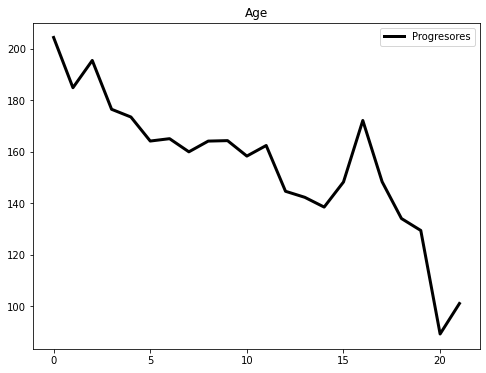

In [100]:
row_max = 0
matrices = [] #list of matrices. Each list element is a matrix for one patient, with rows = reviews, cols = features

for paciente in progresores:
        pacientes = pd.read_csv('./pacientes/' + paciente+'.csv',usecols = list(range(22))) #dataframe con variables.
        #remove last column (date)
        matrix_pat = pacientes.to_numpy() #one patient matrix
       
        
        matrices.append(matrix_pat)
        #print(len(matrices))
        
        #get the maximum number of rows : it is the maiximum number of reviews for a given patient.
        
        filas = matrix_pat.shape[0]
         
        if filas > row_max:
            row_max = filas

            
#build complete matrix
     
X = np.zeros((len(matrices),row_max,22))
X[:,:,:] = np.nan
#print(X.shape)


for i,mat in enumerate(matrices):
    
    #print(mat.shape)
    X[i,:mat.shape[0],:] = mat
    
#print(X)

plt.figure(figsize = (8,6))

#__ = plt.plot(X[:,:,13].T,linewidth = 0.1,color = [.5]*3)

feature_names = ['Age','Weight'] 

plt.plot(np.nanmean(X[:,:,13],axis = 0),color ='k',linewidth = 3,label = 'Progresores') 
plt.title(feature_names[0])
plt.legend()

#print(row_max)
#print(matrices[1].shape)
#print(matrices)    

#matrices_aux = np.asarray(matrices)



In [ ]:



        X_features = np.zeros((len(progresores) ,col_max))
        print(X_features.shape)
        X_features[:,:] = np.nan
        for i in columna:
            for j in range(len(progresores)):
                X_features[j,:i] = matrices[i][:,4].flatten()'''

In [25]:
print(X_pac[0])
print(X6[:,0].flatten())

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


NameError: name 'X6' is not defined

In [23]:
X_pac = np.zeros((5,24))
X_pac[:,:] = np.nan
X_pac[0,:X5.shape[0]] = X5[:,4].flatten() #En la fila 0 y las columnas de X5.shape meteme la variable 4
X_pac[1,:X6.shape[0]] = X6[:,4].flatten()
X_pac[2,:X7.shape[0]] = X7[:,4].flatten()
X_pac[3,:X8.shape[0]] = X8[:,4].flatten()
X_pac[4,:X9.shape[0]] = X9[:,4].flatten()
X_pac

NameError: name 'X5' is not defined

<ipython-input-26-d1ea57f70ae1>:1: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(X_pac,axis = 0), label = 'no_progresores')
<ipython-input-26-d1ea57f70ae1>:2: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(X_pac,axis = 0) + np.nanstd(X_pac,axis = 0), linestyle = ':', linewidth = 0.5, color = 'k')
/home/obarquero/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-26-d1ea57f70ae1>:3: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(X_pac,axis = 0) - np.nanstd(X_pac,axis = 0), linestyle = ':', linewidth = 0.5, color = 'k')
/home/obarquero/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


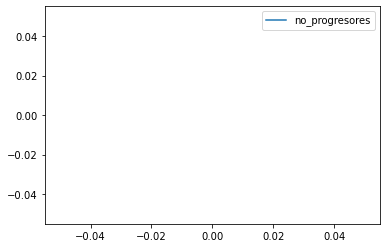

In [26]:
plt.plot(np.nanmean(X_pac,axis = 0), label = 'no_progresores')
plt.plot(np.nanmean(X_pac,axis = 0) + np.nanstd(X_pac,axis = 0), linestyle = ':', linewidth = 0.5, color = 'k')
plt.plot(np.nanmean(X_pac,axis = 0) - np.nanstd(X_pac,axis = 0), linestyle = ':', linewidth = 0.5, color = 'k')
plt.legend()
#xx = np.arange(X_pac.shape[1])
#plt.plot(xx, X_pac.T, linewidth = 0.3, color = [0.5,0.5,0.5])


In [27]:
## Analizar las 20.. variables, media y varianza de progresores y no progresores
## funcion que reciba el dataframe y el string de las varibales y que devuelva dos matrices X, una para progresores y no progresores.
## Busco el paciente con mas revisiones y hago una matriz con tantas filas como pacientes y columnas como maximo de revisiones

In [28]:
df['Historia'][df['Progresion'] == '0']
##DE LA COLUMNA HISTORIA, COJO DE LA COLUMNA DE PROGRESION AQUELLOS QUE SEAN = 0 o 1

1       100257
2        10045
3       100505
4       100598
5       100756
         ...  
1640      9926
1642     99582
1643      9970
1645     99835
1646      9985
Name: Historia, Length: 1515, dtype: object

In [29]:
import matplotlib.pyplot as plt

plt.plot(X[:,8],'o-')
plt.plot(X1[:,8]'o-')
plt.plot(X2[:,8],'o-')
plt.plot(X3[:,8],'o-')
plt.plot(X4[:,8],'o-')
plt.plot(X5[:,8],'o-')
plt.plot(X6[:,8],'o-')
plt.plot(X7[:,8],'o-')
plt.plot(X8[:,8],'o-')
plt.plot(X9[:,8],'o-')



SyntaxError: invalid syntax (<ipython-input-29-d5bb0b11d38e>, line 4)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X[:,8])
X[0]

In [ ]:
X_poly[0]
